## Dataset Source

This dataset was downloaded from [Kaggle - Cafe Sales Dataset](https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training).

The dataset includes features like Transaction ID, Item	Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date

## Goal / Objective

The objective of this project is to analyze café sales data to uncover insights into customer purchasing behavior, item popularity, sales trends, and revenue generation. Through data cleaning, exploration, and visualization, this analysis aims to:

- Identify top-selling and high-revenue items

- Understand quantity patterns and pricing impact

- Explore payment preferences across customers

- Evaluate sales trends over time and by location

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dirty_cafe_sales.csv')
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


## Explore Data

In [3]:
df.shape

(10000, 8)

The dataset have 10000 rows and 8 columns

In [4]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [5]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [7]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64

The Location and Payment Method columns have the highest missing values, followed by Item, Quantity, Price Per Unit, Total Spent, and Transaction Date.

## Data Cleaning

In [9]:
df.rename(columns={'Transaction ID': 'transaction_id', 'Item': 'item','Quantity': 'quantity','Price Per Unit': 'price_per_unit', 'Total Spent': 'total_spent','Payment Method': 'payment_method','Location': 'location', 'Transaction Date': 'transaction_date'}, inplace=True)

In [10]:
df.columns

Index(['transaction_id', 'item', 'quantity', 'price_per_unit', 'total_spent',
       'payment_method', 'location', 'transaction_date'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.item.value_counts()

item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [13]:
df['item'] = df['item'].replace('ERROR', 'UNKNOWN')

In [14]:
df['item'].fillna('UNKNOWN', inplace=True)

In [15]:
df.item.value_counts()

item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      969
Name: count, dtype: int64

In [16]:
df.quantity.value_counts()

quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
Name: count, dtype: int64

In [17]:
df.quantity = pd.to_numeric(df['quantity'], errors='coerce')

In [18]:
df.quantity.fillna(0, inplace=True)

In [19]:
# Replacing nan value with the mode of each group
df['quantity']=df.groupby('item')['quantity'].transform(lambda x:x.replace(0,x.mode()[0]))

In [20]:
df.quantity.value_counts()

quantity
5.0    2278
2.0    2141
3.0    1896
4.0    1863
1.0    1822
Name: count, dtype: int64

In [21]:
df['price_per_unit'].value_counts()

price_per_unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
UNKNOWN     164
Name: count, dtype: int64

In [22]:
df['price_per_unit'] = pd.to_numeric(df['price_per_unit'], errors='coerce')

In [23]:
df['price_per_unit'].fillna(0, inplace=True)

In [24]:
# Replacing 0 with mode in each group of item for 'price_per_unit'
df['price_per_unit'] = df.groupby('item')['price_per_unit'].transform(lambda x : x.replace(0, x.mode()[0]))

In [25]:
df['price_per_unit'].value_counts()

price_per_unit
3.0    2598
4.0    2440
2.0    1284
5.0    1270
1.0    1209
1.5    1199
Name: count, dtype: int64

In [26]:
df['total_spent'].value_counts()

total_spent
6.0        979
12.0       939
3.0        930
4.0        923
20.0       746
15.0       734
8.0        677
10.0       524
2.0        497
9.0        479
5.0        468
16.0       444
25.0       259
7.5        237
1.0        232
4.5        225
1.5        205
UNKNOWN    165
ERROR      164
Name: count, dtype: int64

In [27]:
df['total_spent'] = pd.to_numeric(df['total_spent'], errors='coerce')

In [28]:
df['total_spent'].fillna(0, inplace=True)

In [29]:
df['total_spent'] = df.groupby('item')['total_spent'].transform(lambda x : x.replace(0, x.mode()[0]))

In [30]:
df['total_spent'].value_counts()

total_spent
6.0     1035
3.0     1028
12.0     939
4.0      923
20.0     884
15.0     785
8.0      677
10.0     574
2.0      554
9.0      479
5.0      468
16.0     444
25.0     311
7.5      237
1.0      232
4.5      225
1.5      205
Name: count, dtype: int64

In [31]:
df['payment_method'].value_counts()

payment_method
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

In [32]:
df['payment_method'] = df['payment_method'].str.strip()

In [33]:
df['payment_method'] = df['payment_method'].replace('ERROR', 'UNKNOWN')

In [34]:
payment_method_nan = df['payment_method'].isna()

In [35]:
df.loc[payment_method_nan, 'payment_method'] = df['payment_method'].dropna().sample(n=payment_method_nan.sum(), replace=True).values

In [36]:
df['payment_method'].value_counts()

payment_method
Credit Card       3084
Digital Wallet    3084
Cash              3021
UNKNOWN            811
Name: count, dtype: int64

In [37]:
df['location'].value_counts()

location
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

In [38]:
df['location'] = df['location'].replace('ERROR', 'UNKNOWN')

In [39]:
location_nan = df['location'].isna()
df.loc[location_nan, 'location'] = df['location'].dropna().sample(n=location_nan.sum(), replace=True).values

In [40]:
df['location'].value_counts()

location
Takeaway    4563
In-store    4421
UNKNOWN     1016
Name: count, dtype: int64

In [41]:
df['transaction_date'].value_counts()

transaction_date
UNKNOWN       159
ERROR         142
2023-06-16     40
2023-02-06     40
2023-07-21     39
             ... 
2023-04-27     15
2023-09-24     15
2023-07-22     14
2023-03-11     14
2023-02-17     14
Name: count, Length: 367, dtype: int64

In [42]:
import datetime as dt
df['transaction_date']=pd.to_datetime(df['transaction_date'], errors='coerce')
df['transaction_date'].value_counts()

transaction_date
2023-02-06    40
2023-06-16    40
2023-03-13    39
2023-07-21    39
2023-09-21    39
              ..
2023-04-27    15
2023-11-24    15
2023-03-11    14
2023-02-17    14
2023-07-22    14
Name: count, Length: 365, dtype: int64

In [43]:
df['transaction_date'].isna().sum()

460

In [44]:
df['month']=df['transaction_date'].dt.month
df['month'].fillna(df['month'].mode()[0],inplace=True)

In [45]:
df['month'].value_counts()

month
10.0    1298
3.0      827
6.0      818
1.0      818
8.0      803
12.0     795
7.0      791
9.0      788
11.0     784
5.0      777
4.0      774
2.0      727
Name: count, dtype: int64

In [46]:
df['transaction_date'] = df.groupby('month')['transaction_date'].transform(lambda x : x.fillna(x.mode()[0]))

In [47]:
df['transaction_date'].value_counts()

transaction_date
2023-10-22    497
2023-02-06     40
2023-06-16     40
2023-07-21     39
2023-07-24     39
             ... 
2023-04-27     15
2023-09-24     15
2023-07-22     14
2023-03-11     14
2023-02-17     14
Name: count, Length: 365, dtype: int64

In [48]:
df.isnull().sum() / len(df) * 100

transaction_id      0.0
item                0.0
quantity            0.0
price_per_unit      0.0
total_spent         0.0
payment_method      0.0
location            0.0
transaction_date    0.0
month               0.0
dtype: float64

## EDA

#### Univariate Analysis

In [49]:
df['item'].value_counts()

item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      969
Name: count, dtype: int64

<Axes: title={'center': 'Most Sold Items'}, xlabel='item'>

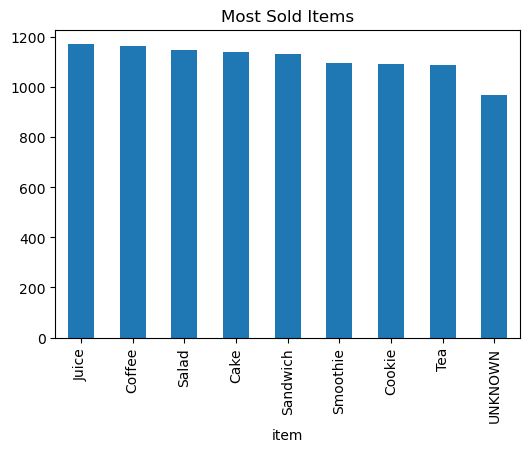

In [50]:
# Items
df['item'].value_counts().plot(kind='bar', figsize=(6, 4), title='Most Sold Items')

The distribution of items is fairly balanced, with slight variation across products

In [51]:
df['payment_method'].value_counts()

payment_method
Credit Card       3084
Digital Wallet    3084
Cash              3021
UNKNOWN            811
Name: count, dtype: int64

<Axes: title={'center': 'Payment Method Distribution'}, xlabel='payment_method'>

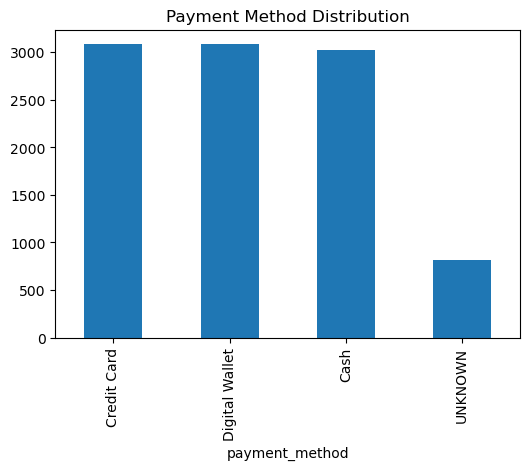

In [52]:
# Payment Method
df['payment_method'].value_counts().plot(kind='bar', figsize=(6, 4), title='Payment Method Distribution')

Customers mostly use Digital Wallet, followed closely by Credit Card and Cash, showing a healthy mix of payment preferences.

In [53]:
df['location'].value_counts()

location
Takeaway    4563
In-store    4421
UNKNOWN     1016
Name: count, dtype: int64

<Axes: title={'center': 'Transactions by Location'}, xlabel='location'>

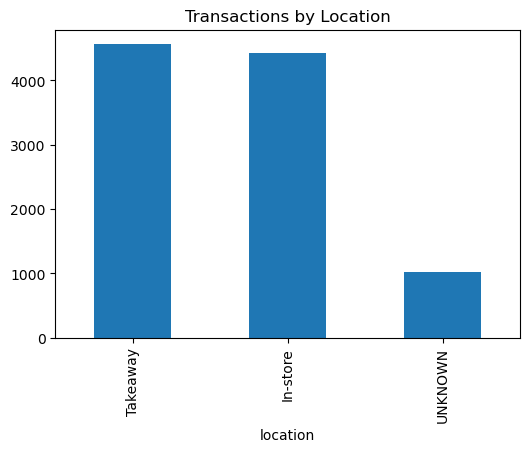

In [54]:
# Location
df['location'].value_counts().plot(kind='bar', figsize=(6, 4), title='Transactions by Location')

Takeaway and In-Store have the same number of transactions.

<Axes: title={'center': 'Quantity Ordered Distribution'}, xlabel='quantity'>

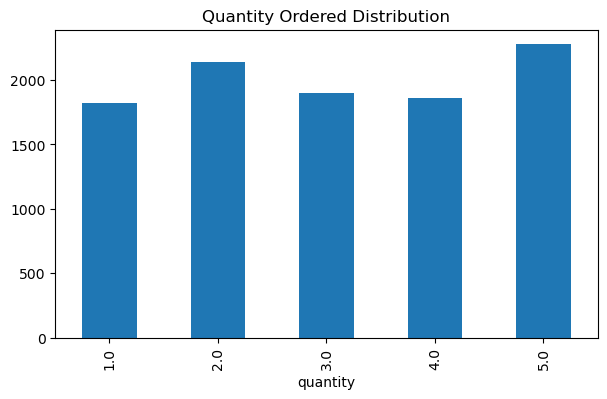

In [55]:
# Quantity
df['quantity'].value_counts().sort_index().plot(kind='bar', figsize=(7, 4), title='Quantity Ordered Distribution')

Most customers tend to order 1 to 5 units, with 2 and 5 being the most common.

In [56]:
df['price_per_unit'].value_counts()

price_per_unit
3.0    2598
4.0    2440
2.0    1284
5.0    1270
1.0    1209
1.5    1199
Name: count, dtype: int64

<Axes: title={'center': 'Price per Unit Distribution'}, xlabel='Price Per Unit', ylabel='Frequency'>

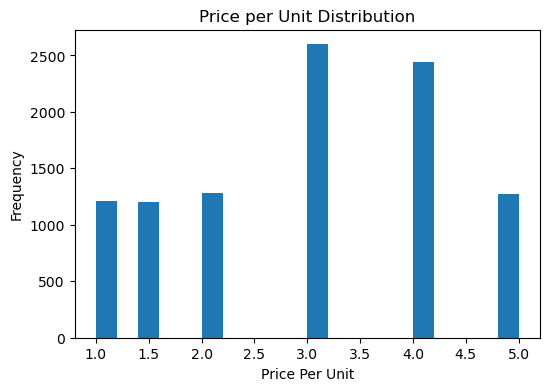

In [57]:
# Price per Unit
df['price_per_unit'].plot(kind='hist', bins=20, figsize=(6, 4), title='Price per Unit Distribution', xlabel='Price Per Unit')

There is a consistent demand across all price levels, with slight preference toward mid-range items priced at 3 and 4.

<Axes: title={'center': 'Transactions by Month'}, xlabel='Month'>

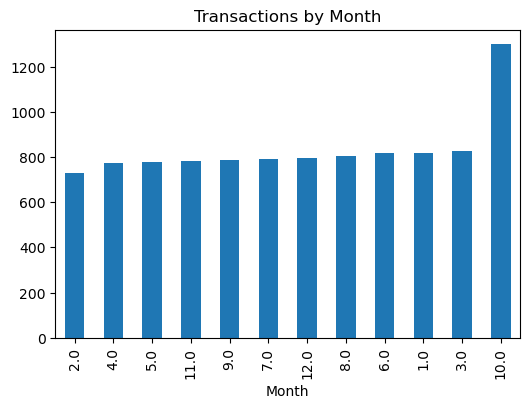

In [58]:
# Month
df['month'].value_counts(ascending=False).sort_values().plot(kind='bar', figsize=(6, 4), title='Transactions by Month', xlabel='Month', ylabel='')

October had the highest number of transactions, while February had the lowest. Overall, monthly transactions appear fairly consistent, with only slight variations across most months.

#### Bivariate Analysis

In [59]:
df.groupby('item')['total_spent'].sum().sort_values(ascending=False)

item
Salad       17905.0
Sandwich    14276.0
Smoothie    13996.0
Cake        10698.0
Juice       10320.0
UNKNOWN      8290.0
Coffee       7284.0
Tea          4879.5
Cookie       3184.0
Name: total_spent, dtype: float64

<Axes: title={'center': 'Total Revenue by Item'}, xlabel='Item', ylabel='Total Spent'>

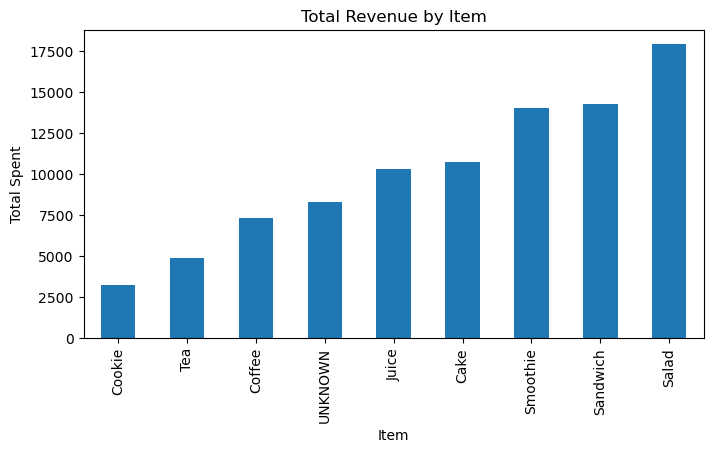

In [60]:
# Total Spent vs Item
df.groupby('item')['total_spent'].sum().sort_values().plot(kind='bar', figsize=(8, 4), title='Total Revenue by Item',xlabel='Item', ylabel='Total Spent')

Salad, Sandwich, and Smoothie are the top-selling items, while Tea and Cookie are the least. So, higher-priced items bring in more money despite lower sales volume.

Text(0, 0.5, 'Quantity')

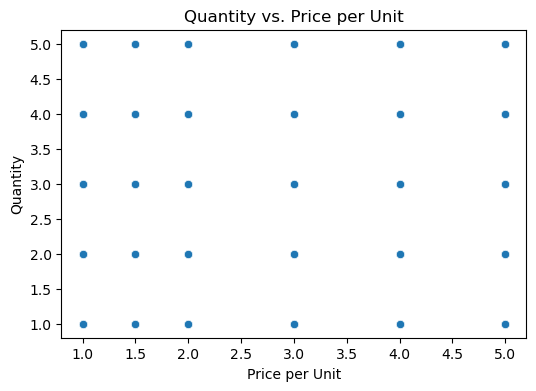

In [61]:
# Quantity vs. Price per Unit
plt.figure(figsize = (6,4))
sns.scatterplot(data=df, x='price_per_unit', y='quantity')
plt.title('Quantity vs. Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity')

Quantity ordered is not strongly affected by price per unit customers buy similar quantities regardless of item price. The distribution is fairly balanced.

Text(0, 0.5, 'Total Spent')

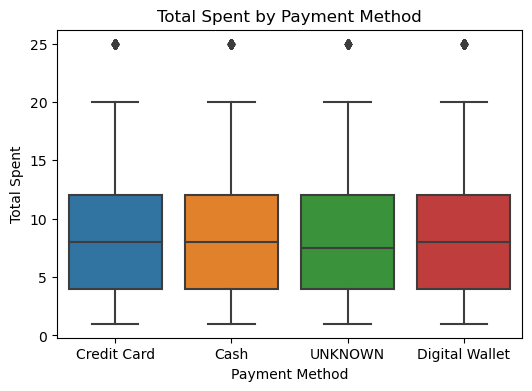

In [62]:
# Total Spent vs Payment Method
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='payment_method', y='total_spent')
plt.title('Total Spent by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Spent')

Cash payments show a higher median and more variability in total spent compared to other methods. All payment types have similar ranges with a few high value outliers.

<Axes: title={'center': 'Total Spent by Location'}, xlabel='Total Spent', ylabel='Location'>

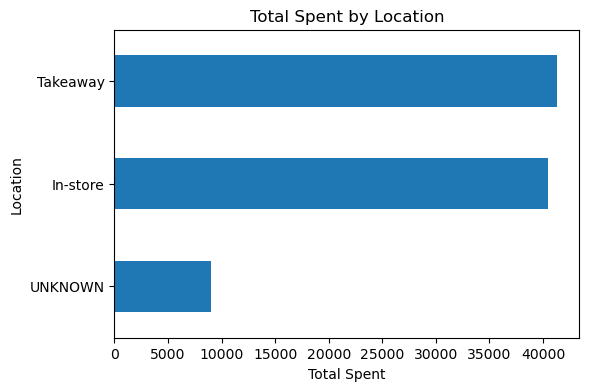

In [63]:
df.groupby('location')['total_spent'].sum().sort_values().plot(kind='barh', figsize=(6, 4), title='Total Spent by Location', xlabel='Total Spent', ylabel='Location')

In-store and Takeaway locations have almost equal total spending, indicating balanced customer preference.

<Axes: title={'center': 'Total Quantity Sold per Item'}, xlabel='Item', ylabel='Quantity'>

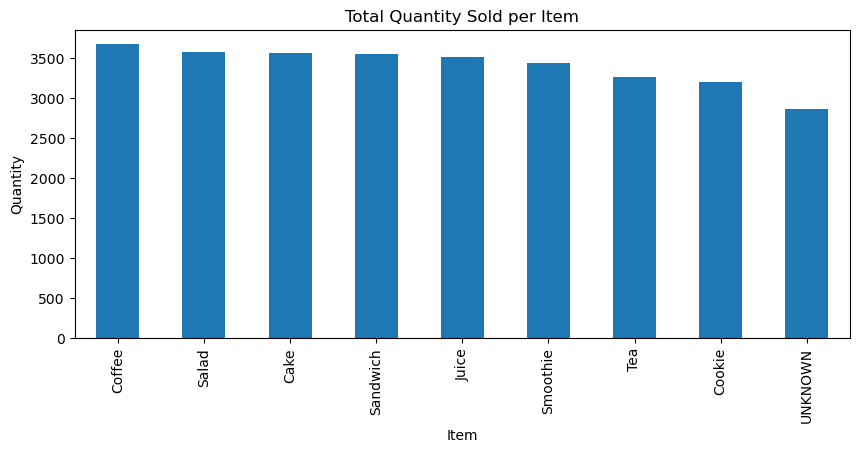

In [64]:
item_quantity_total = df.groupby('item')['quantity'].sum().sort_values(ascending=False)
item_quantity_total.plot(kind='bar', figsize=(10,4), title='Total Quantity Sold per Item', xlabel='Item', ylabel='Quantity')

Coffee, Salad, Cake, and Sandwich are the most sold items by quantity, indicating strong customer preference.

#### Multivariate Analysis

D:\Users\tejal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


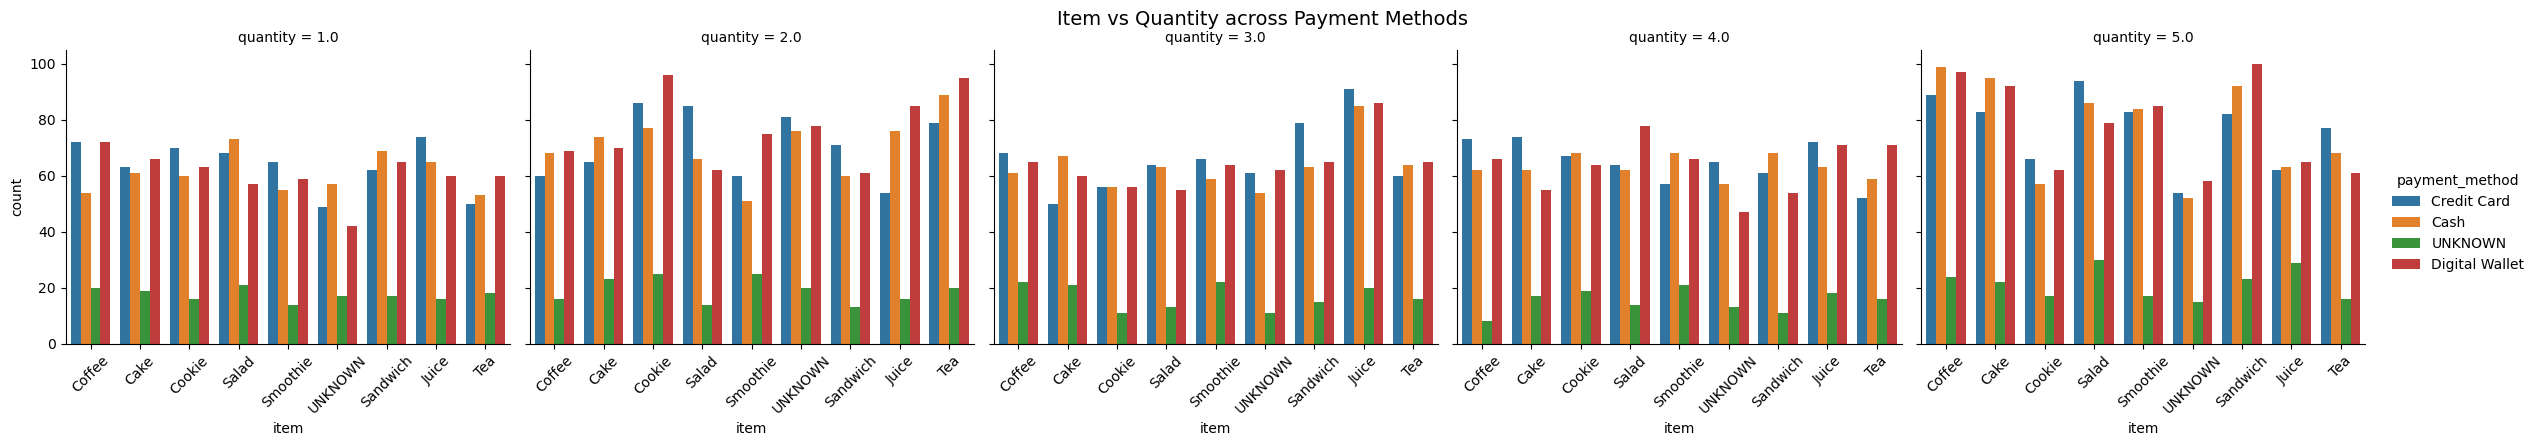

In [65]:
# Item vs Quantity vs Payment Method
g = sns.catplot(data=df, x='item', hue='payment_method', col='quantity',
            kind='count', height=4, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle("Item vs Quantity across Payment Methods")
plt.xticks(rotation=45)
g.fig.suptitle("Item vs Quantity across Payment Methods", fontsize=14)
g.fig.subplots_adjust(top=0.88)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Across all quantities, Sandwich, Salad, and Smoothie are among the most frequently purchased items.
Cash and Credit Card are the most commonly used payment methods, while UNKNOWN is used the least across all item quantity combinations.

<Axes: title={'center': 'Monthly Revenue per Item'}, xlabel='Month', ylabel='Total Spent'>

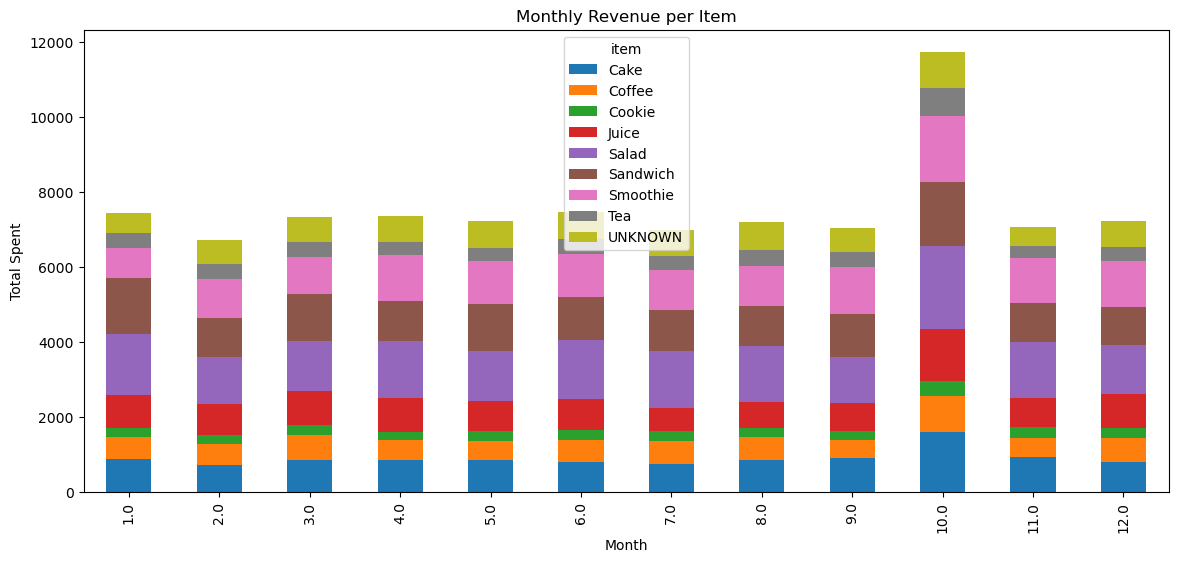

In [66]:
# Item vs Month vs Total Spent
monthly_item_sales = df.groupby(['month', 'item'])['total_spent'].sum().unstack().fillna(0)
monthly_item_sales.plot(kind='bar', stacked=True, figsize=(14, 6), title='Monthly Revenue per Item', xlabel='Month', ylabel='Total Spent')

October generated the highest total revenue, followed by November.
Sandwich, Salad, and Smoothie consistently contribute the most revenue across months

<Axes: title={'center': 'Revenue by Location and Payment Method'}, xlabel='Location', ylabel='Total Spent'>

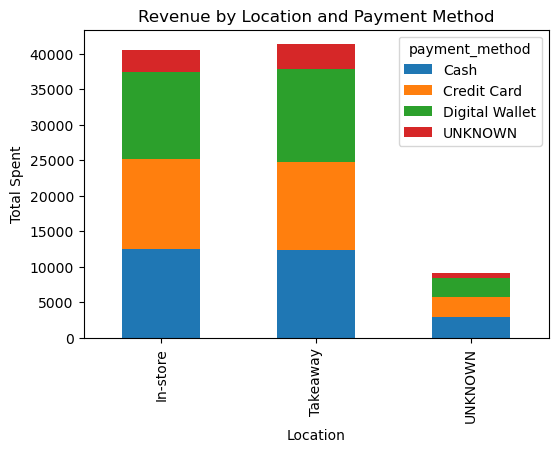

In [67]:
#  Location vs Payment Method vs Total Spent
loc_payment = df.groupby(['location', 'payment_method'])['total_spent'].sum().unstack().fillna(0)
loc_payment.plot(kind='bar', stacked=True, figsize=(6, 4), title='Revenue by Location and Payment Method', xlabel='Location', ylabel='Total Spent')

In-store and Takeaway locations generate similar revenue, with all payment methods contributing evenly.

In [68]:
corr_matrix = df[['quantity', 'price_per_unit', 'total_spent']].corr()
corr_matrix

,quantity,price_per_unit,total_spent
quantity,1.000000,0.034897,0.634450
price_per_unit,0.034897,1.000000,0.654927
total_spent,0.634450,0.654927,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

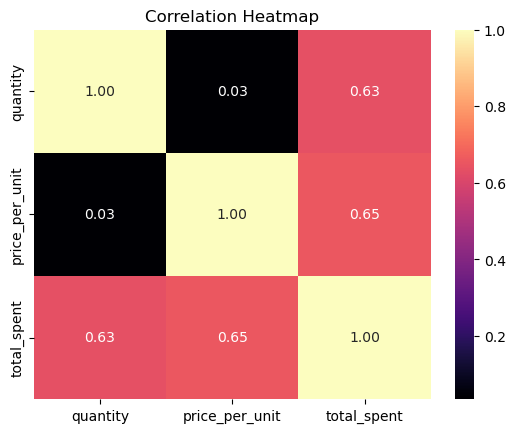

In [69]:
sns.heatmap(corr_matrix, annot=True, cmap='magma',fmt='.2f')
plt.title('Correlation Heatmap')

There is a moderate positive correlation between quantity and total_spent, as well as between price_per_unit and total_spent, indicating that both higher quantity and price contribute to greater spending. The relationship between quantity and price_per_unit is negligible.

### Conclusion:
This cafe sales analysis reveals stable and balanced sales patterns. Salad, Sandwich, and Smoothie consistently lead in both quantity sold and revenue generated. Customers usually order 1 to 5 units, with mid-range items of (3 to 4) being most popular, and pricing has little effect on quantity ordered.

Digital Wallet is the leading payment method, while Cash transactions show higher spending variability. October emerges as the peak revenue month. Both In-store and Takeaway contribute equally to revenue. Correlation analysis confirms that total spend increases with both quantity and price, while their direct relationship is weak.
